In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

Для работы с изображениями, найдем их гистограммы — характеристики распределения интенсивности изображения. Для этого можно воспользоваться следующим методом.

In [199]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

Считаем изображения из корневой папки train и вычислим гистограмму каждого изображения. Кроме того, отделим метку каждого изображения. Обработка большого числа изображений в облачных сервисах занимает длительное время (1-5 минут).

In [200]:
imagePaths = sorted(list(paths.list_images('train_task/train/')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Преобразуем метки в удобный формат 0 и 1 и посмотрим, какой код и какая метка соответствует самой первой попавшейся нам картинке

0


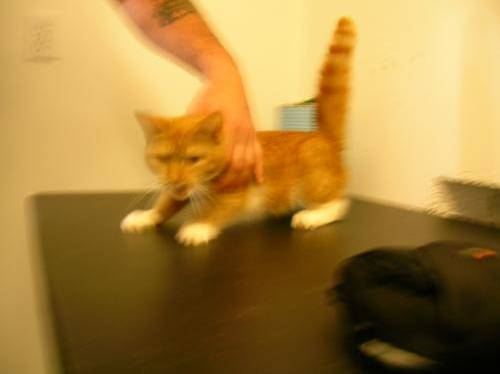

In [201]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

Видно, что классом ноль у нас занумерованы коты (кошки).
Разделим выборку на тренировочную и тестовую в отношении 75/25 с параметром random_state = 9.

In [202]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=9)

Теперь обучим модель почти-разделяющий гиперплосоксти на наших данных, а также оценим ее на тестовых. Параметр C обратно пропорционален параметру модели, про который говорилось в лекции.

In [203]:
model = LinearSVC(random_state = 9, C = 0.51)
model.fit(trainData, trainLabels)

LinearSVC(C=0.51, random_state=9)

In [204]:
predictions = model.predict(testData)

In [205]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

                      precision    recall  f1-score   support

train_task/train/cat       0.57      0.77      0.66       119
train_task/train/dog       0.70      0.47      0.56       131

            accuracy                           0.62       250
           macro avg       0.63      0.62      0.61       250
        weighted avg       0.64      0.62      0.61       250



In [206]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.6103896103896105

Выведем коэффициент $\theta_370$ построенной гиперплоскости:

In [207]:
model.coef_[0][124]

6.818116768179421e-05

Вычислим предсказания для объекта из папки test

In [208]:
singleImage = cv2.imread('test_task/test/cat.1042.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

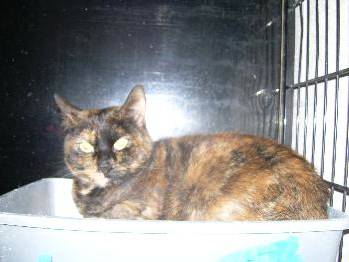

In [209]:
Image(filename='test_task/test/cat.1042.jpg')

In [210]:
prediction


array([1], dtype=int64)